In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Временные ряды

## Где используются?

- Предсказание цен и объемов продаж на биржах
- Предсказание финансовых и экономических показателей
- Предсказание погоды
- Предсказание экономических показателей
- Анализ медико-биологических приборов

## Основные компоненты временного ряда

Временной ряд - набор значений $Y_t$, причем интервал $Δt=const$

Тренд ($Т$) - компонента ряда, показывающая влияние долговременных факторов

Цикличность ($С$) - компонента ряда, описывающая длительные периоды спада и подъема, состоит из циклов, меняющихся по амплитуде и протяженности

Сезонность ($S$) - компонента ряда, состоит из повторяющихся циклов

## Моделирование рядов

$Y = T + C + S + e$ - аддитивная модель

$Y = T * C * S * e$ - мультипликативная модель

От второго можно перейти к первому при помощи логарифмирования.

## Стационарность

Стационарность - важное свойство временных рядов. Стационарные ряды очень просто прогнозировать.

Ряд называется стационарным, если его среднее, ковариация и дисперсия не зависят от времени.

Пример:

![](../images/stationary.png)

Нестационарные ряды:

![](../images/non-stationary.png)



## Стационарен ли ряд с погодой?

Сначала попробуем определить графически

<AxesSubplot:xlabel='Day'>

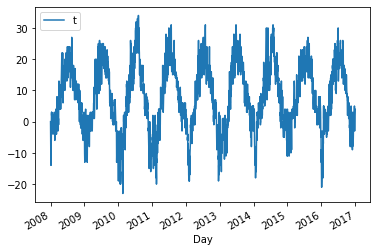

In [3]:
df = pd.read_csv('../data/weather.csv', index_col=0, parse_dates=True)
df.plot()

А если посчитать среднее по месяцам?

In [4]:
df['month'] = df.index.month
df['year'] = df.index.year
df_monthly = df.groupby(['year', 'month']).mean()

<AxesSubplot:xlabel='year,month'>

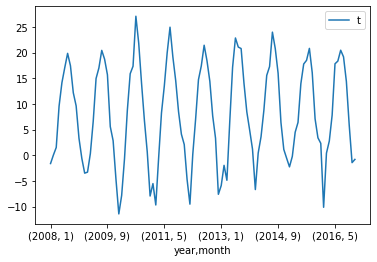

In [5]:
df_monthly.plot()

## Как формально проверять на стационарность?

- Критерий KPSS (Kwiatkowski–Phillips–Schmidt–Shin)
- DF-тест (Dickey — Fuller test)


In [6]:
import statsmodels.tsa.stattools

У критерия KPSS нулевая гипотеза - ряд стационарен.

In [9]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_monthly)
stat, p_value

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.02976111934273086, 0.1)

p-value больше 0.05, нулевая гипотеза верна, ряд стационарен

У теста Дики-Фуллера нулевая гипотеза - ряд нестационарен.

In [10]:
stat, pvalue, *_ = statsmodels.tsa.stattools.adfuller(df_monthly)
stat, pvalue

(-8.615368028158466, 6.311711004709472e-14)

Нулевая гипотеза неверна - ряд стационарен

## Задача

Проверить на стационарность двумя критериями **последний месяц** измерений (по полному датасету)

In [1]:
# Ваш код здесь


## Модель AR

Авторегрессионная модель $AR(p)$ - самая простая модель для предсказания временных рядов.

Построим линейную регрессию на последних $p$ членах ряда:

$Y_t = c + \varepsilon_t + \sum_{i=1}^{p} \alpha_i Y_{t-i}$

$c$ - коэффициент регрессии

$\alpha_i$ - коэффициенты регрессии

$\varepsilon_t$ - случайная ошибка

## Модель MA

Модель скользящего среднего $MA(q)$ (не путать со скользящей средней ряда) работает на основе генерации случайных чисел.

$Y_t = \sum_{i=1}^{q}b_i \varepsilon_{t-i}$

$b_i$ - коэффициенты регрессии

$\varepsilon_t$ - одинаково распределенная случайная величина.

Теорема Вольда доказывает, что моделью $MA(\infty)$ можно предсказать любой стационарный временной ряд.

Но построить такую модель невозможно, поэтому по наперед заданной точности можно подобрать количество параметров $q$, которые будут обеспечивать эту точность.

Чтобы значительно сократить количество параметров, используют модель ARMA.

## Модель ARMA

Модель $ARMA(p, q)$ сочетает в себе модели $AR(p)$ и $MA(q)$:

$Y_t = c + \varepsilon_t + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \sum_{i=1}^{q}b_i \varepsilon_{t-i}$

Моделью ARMA можно прогнозировать любой стационарный процесс с хорошей точностью и довольно небольшими параметрами $p$ и $q$.

## Модель ARIMA

Если ряд нестационарен, то мы можем попытаться свести его к стационарному и применить ARMA.

Есть две основные техники - дифференцирование и логарифмирование.

Модель ARIMA позволяет убирать тренд из ряда при помощи дифференцирования.

У этой модели три гиперпараметра - $p$, $d$ и $q$. 

- $p$ - параметр модели $AR$
- $d$ - количество дифференцирований ряда, определяется подбором
- $q$ - параметр модели $MA$

Качество модели можно измерять при помощи критерия Акаике (AIC). Чем меньше значение, тем лучше, а его абсолютное значение не имеет смысла.

Как определить, что прогноз оптимален? Остатки $y_{pred} - y_{real}$ должны быть распределены нормально.

In [21]:
# Если стоит старый statsmodels, то использовать этот импорт:
# from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima.model import ARIMA 

Попробуем перебрать некоторые параметры и определить "на глаз" + по критерию Акаике какая модель лучше

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AIC= 661.438334919222


C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


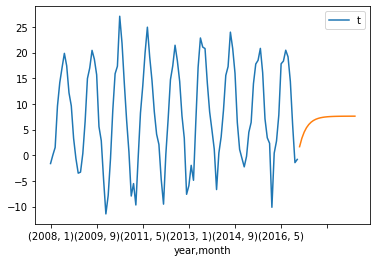

In [22]:
model_fit = ARIMA(df_monthly, order=(1, 0, 1)).fit()
df_monthly.plot()
model_fit.forecast(25).plot()
print('AIC=', model_fit.aic)

## Определяем параметры

Как подобрать оптимальные параметры `p`, `d` и `q`? На самом деле, только перебором, сверяясь с критерием Акаике. 

Но можно сократить перебор, используя графики автокорреляции и частной автокорреляции

На практике брать значения p и q больше 10 не имеет смысла, модель будет считаться очень долго.

In [25]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

<AxesSubplot:xlabel='year,month'>

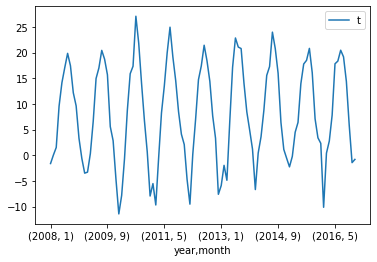

In [26]:
df_monthly.plot()

Все значения ACF вне синей области можно использовать в качестве параметра $p$

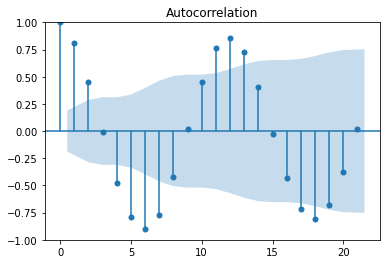

In [30]:
plot_acf(df_monthly)
plt.show()

Все значения PACF вне синей области можно использовать в качестве параметра $q$

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


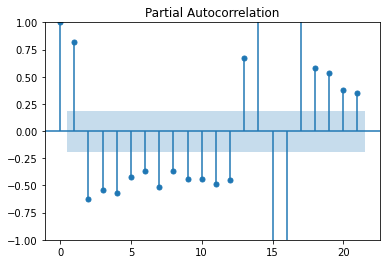

In [31]:
plot_pacf(df_monthly)
plt.show()

## Задача

Найти оптимальные p, q и d (использовать критерий Акаике).

Разбить данные на треин и тест, посчитать МSЕ или MAE, вывести график, на котором отобразить разными цветами:

- тренировочную выборку
- тестовую выборку
- прогноз

Тренировочная выборка должна идти строго перед тестовой (иначе мы перемешаем данные и модель обучится не на том)

In [ ]:
# Ваш код здесь


## Что делать, если ряд нестационарный?

Сводить его к стационарному!

Есть несколько способов это сделать:

- логарифмируем ряд (если есть отрицательные значения, то перед этим добавляем ко всему ряду константу) - в случае, когда дисперсия непостоянная
- дифференцируем - в случае, когда среднее непостоянное (есть линейный тренд)

## Задача

К датасету с погодой применить логарифм и спрогнозировать ряд. Сравнить с тем, что было до этого. Не забываем про обратное преобразование.

In [ ]:
# Ваш код здесь


## Задача

К датасету с погодой примернить дифференцирование и спрогнозировать ряд. Сравнить с тем, что было до этого.

Обратное преобразование можно сделать при помощи `np.cumsum()`

In [ ]:
# Ваш код здесь


Чтобы каждый раз не реализовывать перебор параметров модели, был написан алгоритм авто-аримы. Он реализован, например, в библиотеке `pmdarima`

## Кросс-валидация для временных рядов

![](../images/ts-cross-validation.png)

Можно строить прогноз на 1 шаг вперед и считать метрику между получившимися прогнозами и фактом. Здесь можно считать любую метрику, которая нам понятна и нужна (например, MAE)

Также можно обучать не на всех данных, а на каком-то окне (на последних 10 значениях, например).

## Задача

Реализовать кросс-валидацию для временного ряда, прогнозируя на один шаг вперед. Оценить точность модели.

In [ ]:
# Ваш код здесь


## Многомерные временные ряды

Есть аналог модели AR для многомерных временных рядов - модель VAR. Подробнее - [тут](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)


## Прогнозирование временных рядов с использованием других моделей

Прогнозирование временных рядов можно интерпретировать как задачу регрессии, поэтому можно использовать все модели, которые мы изучали до этого.

Чтобы решить задачу регрессии, нужно определить $X$ и $Y$

Чтобы построить матрицу $X$, нужно немного преобразовать датасет. Будем идти скользящим окном размера $k$ по исходному ряду и каждый шаг сохранять в матрицу $X$, а следующее значение записывать в $Y$.

Таким образом, модель будет пытаться предсказать новое значение на основе $k$ предыдущих.

## Задача

Применить `RandomForestRegressor` к датасету с погодой. Подобрать гиперпараметры. Применить кросс-валидацию, сравнить с ARIMA.

## Частотные подходы к анализу временных рядов

Помимо модели ARIMA существуют другие подходы к моделированию временных рядов.

Можем заметить, что график погоды похож на график синуса. Можно моделировать временные ряды как сумму периодических функций (например, синусов и косинусов). 

$f(x) = \frac{a_0}{2} +  \sum_{i=1}^{n} a_i cos(ix) + b_i sin(ix)$

Такие функции называются рядами Фурье.

Существует теорема о том, что любую непрерывную функцию можно в точности описать рядом Фурье.

На практике это означает, что можно смоделировать с нужной точностью любой временной ряд (по-крайней мере, обучающую выборку).

Для того, чтобы раскладывать сигналы в ряд Фурье, обычно используют преобразование Фурье.

Преобразование Фурье позволяет перейти от координат время-значение к координатам частота-амплитуда.

In [32]:
from scipy.fft import fft, ifft, fftfreq

Создадим сигнал из двух косинусов

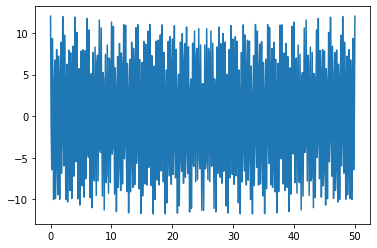

In [33]:
n = 500
t = 1 / 10
x = np.linspace(0, n * t, n)
y = 2 * np.cos(x * np.pi * 2 * 0.5) + 10 * np.cos(x * np.pi * 2 * 3)

plt.plot(x, y)

Вот так он будет выглядеть в пространстве частота-амплитуда

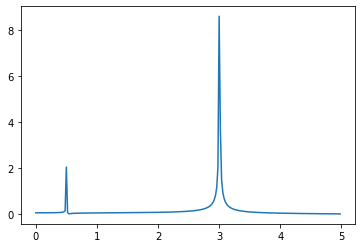

In [34]:
yf = fft(y)
xf = fftfreq(n, t)[:n//2]
plt.plot(xf, 2 / n * np.abs(yf[:n//2]))

Попробуем применить FFT к ряду с погодой по месяцам.

**Важно:** FFT нужно применять к сигналу со средним 0. Иначе будет пик в нулевой точке. А еще чем меньше тренда в данных, тем лучше отработает метод.

In [35]:
df_monthly['t_norm'] = (df_monthly['t'] - df_monthly['t'].mean()) / df_monthly['t'].std()

In [36]:
months_len = 12
n = len(df_monthly)

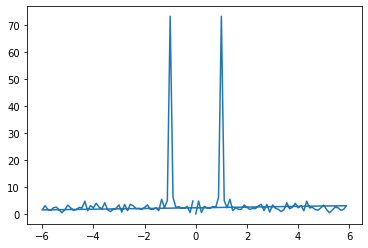

In [37]:
t_yf = fft(df_monthly['t_norm'].values)
t_xf = fftfreq(n, 1 / months_len) # Отмечаем по оси X частоты
plt.plot(t_xf, np.abs(t_yf))

Обнулим весь шум

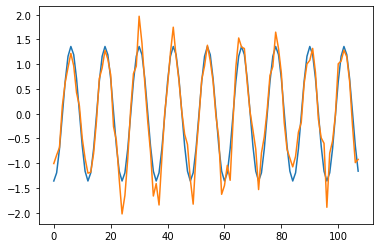

In [38]:
threshold = 10
t_yf[np.abs(t_yf) < threshold] = 0

it_yf = np.real(ifft(t_yf))

plt.plot(it_yf)
plt.plot(df_monthly['t_norm'].values)

Построим прогноз

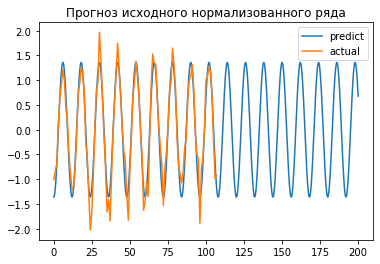

In [39]:
coefs = np.abs(t_yf)[:n // 2]

x = np.linspace(0, 200, 1000)
f_result = np.zeros_like(x)
for i, a_i in enumerate(coefs):
    f_result -= a_i * np.cos(2 * np.pi * i * x / n) / (n * 0.5)

plt.title('Прогноз исходного нормализованного ряда')
plt.plot(x, f_result)
plt.plot(df_monthly['t_norm'].values)
plt.legend(['predict', 'actual'])

Итого, наш ряд моделируется такой функцией: $$f(x) = \frac{73 cos(\frac{2 \pi * 9 x}{n})}{0.5n}$$ где $n$ - количество месяцев.

Чуть более красиво и обобщенно этот метод реализован [тут](https://gist.github.com/tartakynov/83f3cd8f44208a1856ce).

К сожалению, в библиотеках почему-то этот метод не реализовывают.

## Задача

Применить функцию `fourierExtrapolation` к исходному ряду `df['t']`

In [40]:
# Ваш код здесь


## Сглаживание временных рядов

Если во временном ряде есть выбросы, то лучше их убрать. Это можно сделать при помощи фильтров.

Есть три основных фильтра:

- Скользящая средняя - считает среднее для скользящего окна из $n$ элементов
- Медианный фильтр - аналогично, только считает медиану
- Фильтр Фурье - реализовали выше
- Вейвлет-фильтр - похож на фильтр фурье, только используются другие функции вместо синусов

In [41]:
from scipy.signal import medfilt

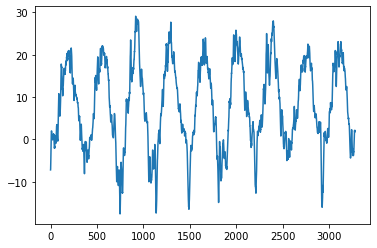

In [42]:
x = df['t']
N = 10
x_filtered = np.convolve(x, np.ones(N)/N, mode='valid')
plt.plot(x_filtered)

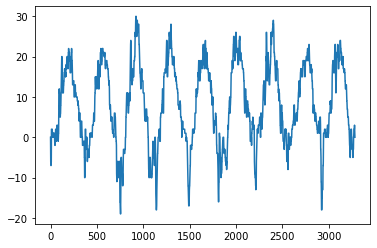

In [43]:
N = 9
x_filtered = medfilt(x, N)
plt.plot(x_filtered)

## Задача

Сравнить качество прогноза на любом из отфильтрованных рядов и на исходных.

**Внимание:** качество всегда сравнивается на исходных данных

In [44]:
# Ваш код здесь


# Домашняя работа

Найти данные о заболеваемости/смертности/выздоровлении COVID-19 (они есть например на Kaggle) и использовать их для решения заданий. Можно использовать как данные по какому-то конкретному региону/стране, так и данные по всему миру.

Скорее всего, результат по всем задачам получится не очень.

## Easy

Проверить ряд на стационарность. Привести ряд к стационарному виду.

Построить прогноз заболеваемости, используя модель ARIMA, на месяц вперед. Подобрать оптимальные параметры модели. Визуализировать результат. Выглядит ли такой прогноз реалистичным? 

Для решения задачи можно использовать `pmdarima`

## Normal

Применить градиентный бустинг для решения задачи. Используя кросс-валидацию, сравнить результаты ARIMA и бустинга.

## Hard

Применить библиотеку Prophet, сравнить результаты с предыдущими двумя.

Сравнить результат с бейзлайн-решением (прогноз на завтра - сегодняшнее количество).

Сравнить результат со сглаживанием и без.

Оценить остатки всех трех моделей, проверить гипотезу, что остатки распределены нормально.